<a href="https://colab.research.google.com/github/A01741304/PCAtest/blob/main/PROYECTO_Edgar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #LIBRERIAS
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics

from keras.datasets import mnist

In [ ]:
#importar base de datos

from google.colab import files
load=files.upload()


Saving bci_clean.csv to bci_clean.csv


In [ ]:
df=pd.read_csv("bci_clean.csv")

#bci_clean.head()

In [ ]:
df.head()

,Unnamed: 0,Fz,Cz,P3,Pz,P4,PO7,PO8,Oz,TIMESTAMP,MARK,is_stimulus_end,is_stimulus_start,is_target,block_index
0,0,-5.403904,-7.290181,-8.514755,-7.564877,-6.782022,-4.095681,-4.763406,-4.674628,1.683670e+12,3,False,False,False,1
1,1,-8.888752,-8.671151,-8.259143,-7.671248,-6.885561,-3.794405,-3.822653,-5.255145,1.683670e+12,0,False,False,False,1
2,2,-12.272394,-11.536997,-9.111593,-8.996366,-8.769517,-2.913138,-7.234003,-6.823079,1.683670e+12,0,False,False,False,1
3,3,-10.746406,-11.369445,-8.214277,-8.775636,-8.814828,0.235706,-7.651865,-5.782845,1.683670e+12,0,False,False,False,1
4,4,-5.824111,-8.504912,-6.004889,-6.853916,-6.969442,3.622827,-5.155317,-1.516520,1.683670e+12,0,False,False,False,1


In [ ]:
#Eliminamos las columnas irrelevantes para nuestros cálculos
eightcolumns=df
eightcolumns.drop(columns=["Unnamed: 0","TIMESTAMP","MARK","is_stimulus_end","is_stimulus_start","is_target","block_index"],inplace=True)
display(eightcolumns)
'''
https://www.edlitera.com/blog/posts/pandas-add-rename-remove-columns#:~:text=the%20inplace%20argument.-,How%20to%20Remove%20Columns%20From%20a%20DataFrame,want%20to%20modify%20our%20DataFrame.
'''

,Fz,Cz,P3,Pz,P4,PO7,PO8,Oz
0,-5.403904,-7.290181,-8.514755,-7.564877,-6.782022,-4.095681,-4.763406,-4.674628
1,-8.888752,-8.671151,-8.259143,-7.671248,-6.885561,-3.794405,-3.822653,-5.255145
2,-12.272394,-11.536997,-9.111593,-8.996366,-8.769517,-2.913138,-7.234003,-6.823079
3,-10.746406,-11.369445,-8.214277,-8.775636,-8.814828,0.235706,-7.651865,-5.782845
4,-5.824111,-8.504912,-6.004889,-6.853916,-6.969442,3.622827,-5.155317,-1.516520
...,...,...,...,...,...,...,...,...
53748,25.217644,-4.185479,26.240248,34.568241,19.936113,21.587425,27.719536,41.819363
53749,26.455408,-2.398480,29.410112,36.805458,21.468817,20.985954,27.166149,43.654140
53750,31.811203,4.136428,37.235676,42.709255,27.498524,22.056950,32.348690,44.974751
53751,38.902855,12.367685,45.108139,50.259056,36.002716,28.427923,42.870941,50.168106


'\nhttps://www.edlitera.com/blog/posts/pandas-add-rename-remove-columns#:~:text=the%20inplace%20argument.-,How%20to%20Remove%20Columns%20From%20a%20DataFrame,want%20to%20modify%20our%20DataFrame.\n'

In [ ]:
#OBTENER LA MEDIA DE CADA VARIABLE

df.mean()

Fz     0.014311
Cz     0.015637
P3     0.025597
Pz     0.014680
P4     0.032264
PO7   -0.161248
PO8   -0.048584
Oz    -0.183846
dtype: float64

In [ ]:
#OBTENER VARIANZA DE CADA VARIABLE

df.var()

Fz      220.520422
Cz      148.521585
P3      224.766729
Pz      304.881160
P4      187.746731
PO7     935.918634
PO8     479.858931
Oz     1386.995700
dtype: float64

In [ ]:
#Estandarización

#Se estandarizan los datos de cada variable guardándolos en un vector y después agregando cada vector a una matriz
standarizedmatrix=np.empty((8, len(eightcolumns)))
for i in range (8):
  tempvector=[]
  promvariable=statistics.mean(eightcolumns[eightcolumns.columns[i]])
  stdvariable=statistics.stdev(eightcolumns[eightcolumns.columns[i]])
  for j in range (len(eightcolumns)):
    tempvector.append((eightcolumns.loc[j,eightcolumns.columns[i]]-promvariable)/stdvariable)
  standarizedmatrix[i]=(tempvector)

#Se agrega el título a cada columna
datos= {(eightcolumns.columns[0]): standarizedmatrix[0],
                                  (eightcolumns.columns[1]): standarizedmatrix[1],
                                  (eightcolumns.columns[2]): standarizedmatrix[2],
                                  (eightcolumns.columns[3]): standarizedmatrix[3],
                                  (eightcolumns.columns[4]): standarizedmatrix[4],
                                  (eightcolumns.columns[5]): standarizedmatrix[5],
                                  (eightcolumns.columns[6]): standarizedmatrix[6],
                                  (eightcolumns.columns[7]): standarizedmatrix[7]}

#Se convierte la matriz en dataframe
eightcolumnsstandard = pd.DataFrame(datos)
display(eightcolumnsstandard)
'''
https://builtin.com/data-science/step-step-explanation-principal-component-analysis
https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
https://docs.python.org/3/library/statistics.html

'''

,Fz,Cz,P3,Pz,P4,PO7,PO8,Oz
0,-0.364865,-0.599479,-0.569652,-0.434089,-0.497318,-0.128607,-0.215233,-0.120583
1,-0.599536,-0.712795,-0.552603,-0.440181,-0.504874,-0.118759,-0.172287,-0.136170
2,-0.827391,-0.947952,-0.609462,-0.516072,-0.642369,-0.089952,-0.328016,-0.178271
3,-0.724631,-0.934203,-0.549610,-0.503430,-0.645676,0.012975,-0.347092,-0.150339
4,-0.393162,-0.699154,-0.402241,-0.393371,-0.510996,0.123692,-0.233124,-0.035784
...,...,...,...,...,...,...,...,...
53748,1.697202,-0.344723,1.748550,1.978917,1.452616,0.710909,1.267622,1.127833
53749,1.780554,-0.198090,1.959984,2.107044,1.564475,0.691248,1.242360,1.177099
53750,2.141215,0.338132,2.481959,2.445161,2.004534,0.726256,1.478944,1.212559
53751,2.618769,1.013548,3.007062,2.877545,2.625184,0.934507,1.959287,1.352006


'\nhttps://builtin.com/data-science/step-step-explanation-principal-component-analysis\nhttps://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/\nhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html\nhttps://docs.python.org/3/library/statistics.html\n\n'

In [ ]:
#Se hace una matriz de covarianzas
covariancematrix=np.empty((8, 8))
for i in range (8):
  tempvectorcov=[]
  for j in range(8):
    if i==j:
      tempvectorcov.append(statistics.variance(eightcolumns[eightcolumns.columns[i]]))
    else:
      tempvectorcov.append(statistics.covariance(eightcolumns[eightcolumns.columns[i]], eightcolumns[eightcolumns.columns[j]]))
  covariancematrix[i]=tempvectorcov


#Se agrega el título a cada columna
datoscov= {(eightcolumns.columns[0]): covariancematrix[0],
                                  (eightcolumns.columns[1]): covariancematrix[1],
                                  (eightcolumns.columns[2]): covariancematrix[2],
                                  (eightcolumns.columns[3]): covariancematrix[3],
                                  (eightcolumns.columns[4]): covariancematrix[4],
                                  (eightcolumns.columns[5]): covariancematrix[5],
                                  (eightcolumns.columns[6]): covariancematrix[6],
                                  (eightcolumns.columns[7]): covariancematrix[7],}
#Se crea el dataframe
eightcolumnscov = pd.DataFrame(data=datoscov, index=[eightcolumns.columns[0],eightcolumns.columns[1],eightcolumns.columns[2],eightcolumns.columns[3],
                                                          eightcolumns.columns[4],eightcolumns.columns[5],eightcolumns.columns[6],eightcolumns.columns[7],])

display(eightcolumnscov)

'''
https://builtin.com/data-science/step-step-explanation-principal-component-analysis
https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
https://docs.python.org/3/library/statistics.html

'''

,Fz,Cz,P3,Pz,P4,PO7,PO8,Oz
Fz,220.520422,122.088938,163.336213,224.537145,157.781062,242.967956,220.344067,250.454960
Cz,122.088938,148.521585,147.898698,131.625879,139.544297,19.287083,56.465278,-10.256271
P3,163.336213,147.898698,224.766729,204.839841,187.843263,72.056767,117.323531,23.080472
Pz,224.537145,131.625879,204.839841,304.881160,201.383064,345.927188,297.143722,364.939239
P4,157.781062,139.544297,187.843263,201.383064,187.746731,105.252017,143.593601,80.009838
PO7,242.967956,19.287083,72.056767,345.927188,105.252017,935.918634,607.157993,1104.186128
PO8,220.344067,56.465278,117.323531,297.143722,143.593601,607.157993,479.858931,722.461232
Oz,250.454960,-10.256271,23.080472,364.939239,80.009838,1104.186128,722.461232,1386.995700


'\nhttps://builtin.com/data-science/step-step-explanation-principal-component-analysis\nhttps://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/\nhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html\nhttps://docs.python.org/3/library/statistics.html\n\n'

In [ ]:
#Se hace una matriz de covarianzas
covariancematrixstandard=np.empty((8, 8))
for i in range (8):
  tempvectorcov=[]
  for j in range(8):
    if i==j:
      tempvectorcov.append(statistics.variance(eightcolumnsstandard[eightcolumnsstandard.columns[i]]))
    else:
      tempvectorcov.append(statistics.covariance(eightcolumnsstandard[eightcolumnsstandard.columns[i]], eightcolumnsstandard[eightcolumnsstandard.columns[j]]))
  covariancematrixstandard[i]=tempvectorcov
covariancematrixstandard

#Se agrega el título a cada columna
datoscovstandard= {(eightcolumns.columns[0]): covariancematrixstandard[0],
                                  (eightcolumns.columns[1]): covariancematrixstandard[1],
                                  (eightcolumns.columns[2]): covariancematrixstandard[2],
                                  (eightcolumns.columns[3]): covariancematrixstandard[3],
                                  (eightcolumns.columns[4]): covariancematrixstandard[4],
                                  (eightcolumns.columns[5]): covariancematrixstandard[5],
                                  (eightcolumns.columns[6]): covariancematrixstandard[6],
                                  (eightcolumns.columns[7]): covariancematrixstandard[7],}
#Se crea el dataframe
eightcolumnscovstandard = pd.DataFrame(data=datoscovstandard, index=[eightcolumns.columns[0],eightcolumns.columns[1],eightcolumns.columns[2],eightcolumns.columns[3],
                                                          eightcolumns.columns[4],eightcolumns.columns[5],eightcolumns.columns[6],eightcolumns.columns[7],])

display(eightcolumnscovstandard)

'''
https://docs.python.org/3/library/statistics.html

'''

,Fz,Cz,P3,Pz,P4,PO7,PO8,Oz
Fz,1.000000,0.674617,0.733655,0.865961,0.775433,0.534817,0.677361,0.452864
Cz,0.674617,1.000000,0.809475,0.618559,0.835663,0.051731,0.211510,-0.022597
P3,0.733655,0.809475,1.000000,0.782498,0.914415,0.157105,0.357242,0.041337
Pz,0.865961,0.618559,0.782498,1.000000,0.841727,0.647590,0.776863,0.561200
P4,0.775433,0.835663,0.914415,0.841727,1.000000,0.251088,0.478401,0.156790
PO7,0.534817,0.051731,0.157105,0.647590,0.251088,1.000000,0.905995,0.969138
PO8,0.677361,0.211510,0.357242,0.776863,0.478401,0.905995,1.000000,0.885565
Oz,0.452864,-0.022597,0.041337,0.561200,0.156790,0.969138,0.885565,1.000000


'\nhttps://docs.python.org/3/library/statistics.html\n\n'

In [ ]:
#Sacamos los eigenvectores y eigenvalores (estos vienen automaticamente ordenados de mayor a menor)
from numpy.linalg import eig
amatrix= np.array(covariancematrixstandard)
eigenvalues,eigenvectors=eig(amatrix)


porcentajeeigenvalores=[]
stringeigenvectors=[]

for i in range (8):
  porcentajeeigenvalores.append(str(round((eigenvalues[i]/sum(eigenvalues))*100,2))+" %")
  stringeigenvectors.append(str(eigenvectors[i]))



tablaeigen = pd.DataFrame(
{"Eigenvalor" : eigenvalues,
"%" : porcentajeeigenvalores,
 "Eigenvector" : stringeigenvectors})

tablaeigen = tablaeigen.style.set_caption("Eigenvalores, su aportación a las predicciones y sus respectivos eigenvectores")

display(tablaeigen)

'''
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter15.04-Eigenvalues-and-Eigenvectors-in-Python.html

'''

,Eigenvalor,%,Eigenvector
0,5.085193,63.56 %,[ 0.40470501 0.07532114 -0.29942812 0.84328471 -0.05706124 0.15940536 0.02541757 -0.02102805]
1,2.283248,28.54 %,[ 0.29846404 0.41590832 -0.72086687 -0.38636086 0.09669454 -0.23728626 0.05672512 0.01197409]
2,0.234837,2.94 %,[ 0.34484656 0.3684006 0.41582456 -0.06473151 -0.12782971 0.01844622 0.50872861 0.54108791]
3,0.185776,2.32 %,[ 0.43005672 0.01668584 0.29833606 0.01960487 0.00904899 -0.51651136 -0.66418155 0.13183719]
4,0.021386,0.27 %,[ 0.37580459 0.30991474 0.23922321 -0.24455571 -0.05298793 0.59074191 -0.20813179 -0.50058562]
5,0.033276,0.42 %,[ 0.30697108 -0.46274292 -0.09198206 -0.15426505 0.62484539 0.36406738 -0.06103973 0.36424808]
6,0.062053,0.78 %,[ 0.36560585 -0.34122338 0.155204 -0.03198035 0.17486835 -0.39424847 0.49906301 -0.53825018]
7,0.094230,1.18 %,[ 0.27228141 -0.50866298 -0.19749066 -0.22448547 -0.73969821 0.11919729 -0.00925749 0.12759854]


'\nhttps://pythonnumericalmethods.berkeley.edu/notebooks/chapter15.04-Eigenvalues-and-Eigenvectors-in-Python.html\n\n'

graficos

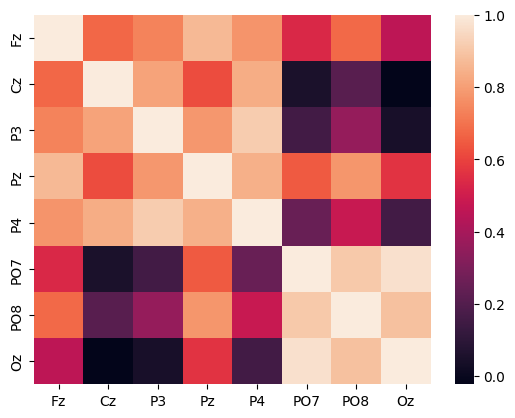

In [ ]:
#SE GRAFICA UN  HEATMAP
import seaborn as sns

#sns.heatmap (df, linewidths = .5, annot = True)
sns.heatmap(df[['Fz', 'Cz','P3','Pz', 'P4', 'PO7', 'PO8', 'Oz']].corr())

plt.savefig('heatmap.jpg')

plt.show()

plt.close()

array([[-0.38336461, -0.49369428, -0.64122862, ...,  2.22430858,
         2.68290117,  3.00162072],
       [ 0.18890659,  0.06098205, -0.06398728, ..., -1.83425946,
        -1.91688565, -1.98239017]])

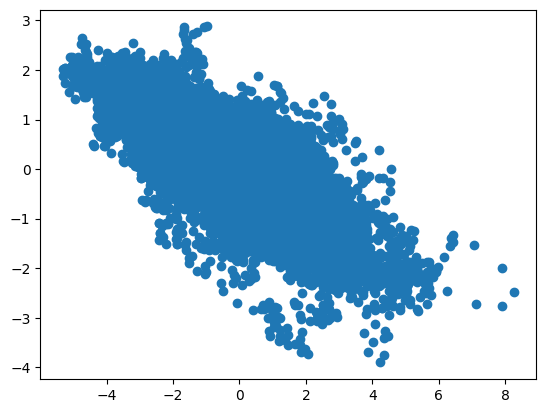

'\nhttps://www.w3schools.com/python/matplotlib_plotting.asp\nhttps://www.programiz.com/python-programming/matrix\nhttps://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html\n\n'

In [ ]:
#GRAFICO EN 2D
featurevector=eigenvectors[:2, :8]
standarizedoriginaldatasett=standarizedmatrix.transpose()
finaldataset=featurevector.dot(standarizedmatrix)
display(finaldataset)

x=finaldataset[0]
y=finaldataset[1]

plt.scatter(x, y)


plt.savefig('figGrafico2D.jpg')

plt.show()

plt.close()
'''
https://www.w3schools.com/python/matplotlib_plotting.asp
https://www.programiz.com/python-programming/matrix
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

'''

array([[-0.38336461, -0.49369428, -0.64122862, ...,  2.22430858,
         2.68290117,  3.00162072],
       [ 0.18890659,  0.06098205, -0.06398728, ..., -1.83425946,
        -1.91688565, -1.98239017],
       [-0.66898811, -0.76961405, -1.03744918, ...,  2.90237877,
         3.75056906,  4.34067374]])

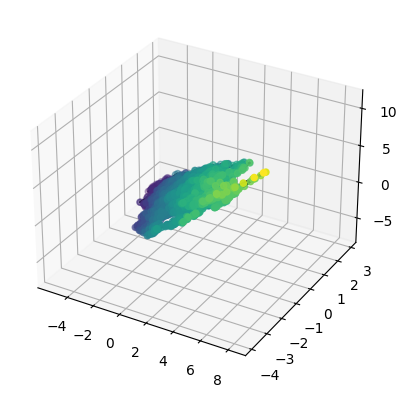

'\nhttps://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html\n\n'

In [ ]:
#Grafico en 3D

from mpl_toolkits import mplot3d
%matplotlib inline

featurevector=eigenvectors[:3, :8]
standarizedoriginaldatasett=standarizedmatrix.transpose()
finaldataset=featurevector.dot(standarizedmatrix)
display(finaldataset)
x=finaldataset[0]
y=finaldataset[1]
z=finaldataset[2]

ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'black')
ax.scatter3D(x, y, z, c=z)

plt.savefig('figGrafico3D.jpg')

plt.show()

plt.close()

'''
https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

'''
